In [2]:
import pycaret
pycaret.__version__

'3.2.0'

In [3]:
import pandas as pd
data = pd.read_csv('current.csv')

In [4]:
# data type check
data['Price'].dtype

dtype('O')

In [5]:
dt = data.dtypes['Price']
print(dt)

object


In [6]:
# change to numeric
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Need to remove missing values in the target column before running it
data.dropna(subset=['Price'], inplace=True)

# change the column to a numeric type
# data['Price'] = data['Price'].astype('int')

In [7]:
from pycaret.regression import *
s = setup(data, target='Price')

,Description,Value
0,Session id,8096
1,Target,Price
2,Target type,Regression
3,Original data shape,"(16681, 19)"
4,Transformed data shape,"(16681, 78)"
5,Transformed train set shape,"(11676, 78)"
6,Transformed test set shape,"(5005, 78)"
7,Numeric features,1
8,Categorical features,17
9,Rows with missing values,12.8%


In [12]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [13]:
type(exp)

pycaret.regression.oop.RegressionExperiment

In [14]:
exp.setup(data, target='Price')

,Description,Value
0,Session id,3806
1,Target,Price
2,Target type,Regression
3,Original data shape,"(16681, 19)"
4,Transformed data shape,"(16681, 77)"
5,Transformed train set shape,"(11676, 77)"
6,Transformed test set shape,"(5005, 77)"
7,Numeric features,1
8,Categorical features,17
9,Rows with missing values,12.8%


In [15]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,10665.7778,560817537.1433,23451.1813,0.5608,0.4380,0.3999,0.0940
lr,Linear Regression,13690.4242,925786769.1381,30194.9991,0.2746,0.6002,0.5719,0.2320
lasso,Lasso Regression,13700.8912,927786970.9853,30227.2804,0.2731,0.6022,0.5727,0.1760
ridge,Ridge Regression,13703.1066,927735268.2460,30226.7315,0.2731,0.6063,0.5727,0.0650
llar,Lasso Least Angle Regression,13700.8808,927787820.5243,30227.2974,0.2731,0.6022,0.5727,0.0790
br,Bayesian Ridge,13779.2955,938839109.3426,30411.3255,0.2638,0.6047,0.5778,0.0790
par,Passive Aggressive Regressor,15023.4621,936564564.6480,30390.8587,0.2620,0.6220,0.6341,0.1180
et,Extra Trees Regressor,13413.1494,947011445.1965,30531.9631,0.2586,0.5631,0.5624,0.9070
en,Elastic Net,13684.3544,954112308.5655,30645.2132,0.2529,0.5905,0.5742,0.0780
lightgbm,Light Gradient Boosting Machine,13658.0623,988464048.2654,31187.3009,0.2261,0.5703,0.5622,0.4480


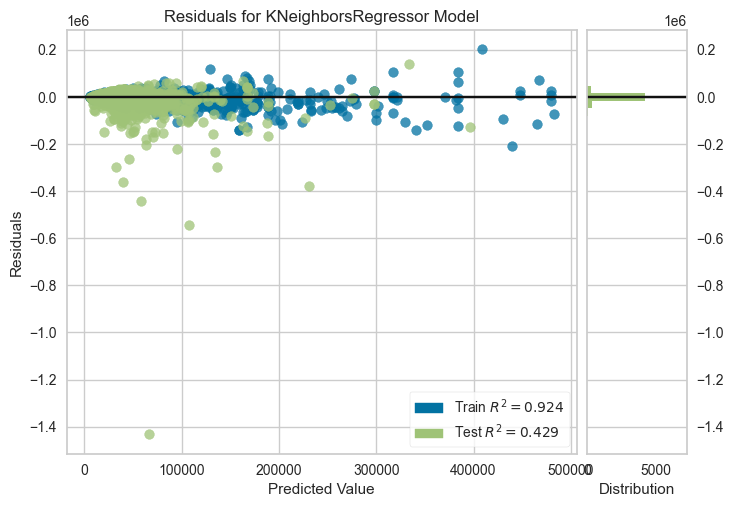

In [16]:
plot_model(best, plot = 'residuals')

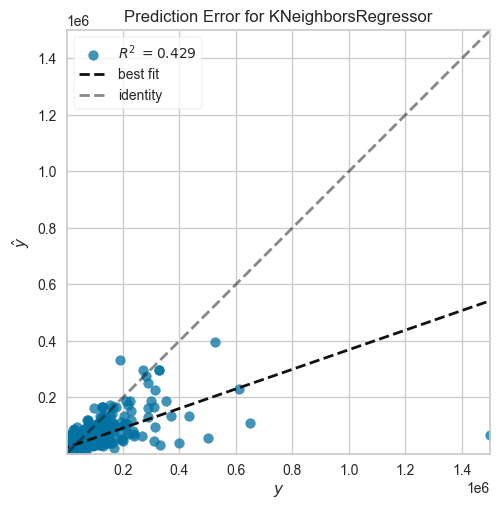

In [17]:
plot_model(best, plot = 'error')

In [18]:
# plot feature importance
plot_model(best, plot = 'feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [19]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [20]:
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,10773.7915,945247809.5834,30744.8827,0.4291,0.4450,0.3895


In [21]:
holdout_pred.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,prediction_label
6086,Mercedes-Benz,2010.0,E350,Sedan,2010 Mercedes-Benz E350 CDI Avantgarde,USED,Automatic,"6 cyl, 3 L",Rear,Diesel,6.9 L / 100 km,123237,Black / Black Leather,"Rydalmere, NSW",6 cyl,Sedan,4 Doors,5 Seats,27950,41290.0
11662,Mitsubishi,2003.0,Express,Commercial,2003 Mitsubishi Express MWB,USED,Automatic,"4 cyl, 2.4 L",Rear,Unleaded,11 L / 100 km,187052,White / -,"Williamstown, VIC",4 cyl,Commercial,2 Doors,2 Seats,11999,15698.6
15703,Subaru,2012.0,XV,SUV,2012 Subaru XV 2.0I-S,USED,Automatic,"4 cyl, 2 L",AWD,Unleaded,7.1 L / 100 km,232600,- / -,"Homebush, NSW",4 cyl,SUV,4 Doors,5 Seats,11999,29962.2
6578,BMW,2018.0,X3,SUV,2018 BMW X3 Xdrive 20D,USED,Automatic,"4 cyl, 2 L",4WD,Diesel,5.7 L / 100 km,111153,Blue / Beige,"Maitland, NSW",4 cyl,SUV,4 Doors,5 Seats,44990,40103.8
11496,Kia,2014.0,Sorento,SUV,2014 Kia Sorento SI (4X4),USED,Automatic,"4 cyl, 2.2 L",AWD,Diesel,7.3 L / 100 km,157310,Grey / -,"South Geelong, VIC",4 cyl,SUV,4 Doors,7 Seats,19990,37169.6


In [62]:
new_data = data.copy()
new_data.drop('Price', axis=1, inplace=True)
new_data.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats


In [70]:
predictions = predict_model(best, data = new_data)
predictions.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,prediction_label
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,48252.000000
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,26233.000000
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,91645.203125
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,35373.601562
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,32556.199219


In [74]:
plot_model(predictions, kind='scatter', x='Label', y='Score')

TypeError: plot_model() got an unexpected keyword argument 'kind'